# Import libraries and data

In [ ]:
!pip install openpyxl

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
file_path = "/content/sample_data/ecommerce retail.xlsx"
ecommerce = pd.read_excel(file_path, engine='openpyxl')





In [ ]:
segment = pd.read_excel("/content/sample_data/Segment.xlsx", engine='openpyxl')

In [ ]:
!pip install dataprep
from dataprep.eda import create_report

# PART 1: EDA


- Missing data: 135080 row of `CustomerID` --> remove row missed data
- Incorrect data type: `CustomerID` should be int64
- Duplicate: 5225 --> remove
- `Quantity` have negative values --> remove rows where `Quantity` <0
- `UnitPrice` have 0 values --> no action
- Outlier: `Quantity` and `UnitPrice` have outliers -> no action


In [ ]:
ecommerce

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
#check null data
ecommerce.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#drop null value customerID
ecommerce.dropna(subset=["CustomerID"], inplace=True)

In [ ]:
ecommerce.info() # CustomerID should be int

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [ ]:
#change type
ecommerce["CustomerID"] = ecommerce["CustomerID"].astype(int)

In [ ]:
#check duplicate
ecommerce.duplicated().sum()

5225

In [ ]:
#drop duplicate
ecommerce.drop_duplicates(inplace = True)

#check duplicate again
ecommerce.duplicated().sum()

0

In [ ]:
ecommerce.describe() # -->Quantity có giá trị âm

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [ ]:
#remove quantity <= 0
ecommerce = ecommerce[(ecommerce["Quantity"]>0)]

In [ ]:
create_report(ecommerce)

NameError: name 'create_report' is not defined

# PART 2: Data Wrangling - CALCULATING RFM

In [ ]:
ecommerce

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
ecommerce["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

### Recency

In [ ]:
# Tính Recency
# Note: Ngày tính của chỉ số R tính vào ngày 31/12/2011

max_invoice_date = ecommerce.groupby("CustomerID")["InvoiceDate"].max()

reference_date = pd.to_datetime("2011-12-31", format="%Y-%m-%d")
Recency = reference_date - max_invoice_date

Recency = Recency.dt.days
print(Recency)

CustomerID
12346    346
12347     23
12348     96
12349     39
12350    331
        ... 
18280    298
18281    201
18282     28
18283     24
18287     63
Name: InvoiceDate, Length: 4339, dtype: int64


In [ ]:
R_score = pd.qcut(Recency, q=5, labels=["5","4","3","2","1"])
print(R_score)

CustomerID
12346    1
12347    5
12348    2
12349    4
12350    1
        ..
18280    1
18281    1
18282    5
18283    5
18287    3
Name: InvoiceDate, Length: 4339, dtype: category
Categories (5, object): ['5' < '4' < '3' < '2' < '1']


### Frequency

In [ ]:
Frequency = ecommerce.groupby("CustomerID")["InvoiceNo"].nunique()
print(Frequency)

CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4339, dtype: int64


In [ ]:
Frequency_ranked = Frequency.rank(method='first')

F_score = pd.qcut(Frequency_ranked, q=5, labels=["1","2","3","4","5"])
print(F_score)

CustomerID
12346    1
12347    5
12348    4
12349    1
12350    1
        ..
18280    2
18281    2
18282    3
18283    5
18287    4
Name: InvoiceNo, Length: 4339, dtype: category
Categories (5, object): ['1' < '2' < '3' < '4' < '5']


### Monetary

In [ ]:
ecommerce["Monetary"] = ecommerce["Quantity"] * ecommerce["UnitPrice"]

Monetary = ecommerce.groupby("CustomerID")["Monetary"].sum()
print(Monetary)

CustomerID
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2045.53
18287     1837.28
Name: Monetary, Length: 4339, dtype: float64


<ipython-input-24-8a6fecdc0328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce["Monetary"] = ecommerce["Quantity"] * ecommerce["UnitPrice"]


In [ ]:
M_score = pd.qcut(Monetary, q=5, labels=["1","2","3","4","5"])
print(M_score)

CustomerID
12346    5
12347    5
12348    4
12349    4
12350    2
        ..
18280    1
18281    1
18282    1
18283    4
18287    4
Name: Monetary, Length: 4339, dtype: category
Categories (5, object): ['1' < '2' < '3' < '4' < '5']


### Create RFM_table

In [ ]:
RFM_table = pd.DataFrame({"Recency": Recency, "Frequency": Frequency, "Monetary": Monetary, "R_score": R_score, "F_score":F_score, "M_score":M_score}).reset_index()
RFM_table["RFM Score"] = RFM_table["R_score"].astype(str) + RFM_table["F_score"].astype(str) + RFM_table["M_score"].astype(str)
RFM_table


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM Score
0,12346,346,1,77183.60,1,1,5,115
1,12347,23,7,4310.00,5,5,5,555
2,12348,96,4,1797.24,2,4,4,244
3,12349,39,1,1757.55,4,1,4,414
4,12350,331,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280,298,1,180.60,1,2,1,121
4335,18281,201,1,80.82,1,2,1,121
4336,18282,28,2,178.05,5,3,1,531
4337,18283,24,16,2045.53,5,5,4,554


In [ ]:
# View segment table
segment

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
segment['RFM Score'] = segment['RFM Score'].str.split(',') #convert string into lists

# Step 2: Use explode() to expand the lists into separate rows
segment_expanded = segment.explode('RFM Score')

# Step 3: Reset the index without keeping the old index - phải có drop = True để bỏ cái index cũ
segment_expanded = segment_expanded.reset_index(drop=True)
segment_expanded

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [ ]:
RFM_table['RFM Score'] = RFM_table['RFM Score'].str.strip() #remove leading/trailing spaces in the RFM Score values that cause mismatches
segment_expanded['RFM Score'] = segment_expanded['RFM Score'].str.strip()

RFM_table_segment = pd.merge(RFM_table,segment_expanded, on = "RFM Score",how = "left")
RFM_table_segment

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM Score,Segment
0,12346,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347,23,7,4310.00,5,5,5,555,Champions
2,12348,96,4,1797.24,2,4,4,244,At Risk
3,12349,39,1,1757.55,4,1,4,414,Promising
4,12350,331,1,334.40,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4334,18280,298,1,180.60,1,2,1,121,Lost customers
4335,18281,201,1,80.82,1,2,1,121,Lost customers
4336,18282,28,2,178.05,5,3,1,531,Potential Loyalist
4337,18283,24,16,2045.53,5,5,4,554,Champions


# PART 3: VISUALIZATION

### Histogram

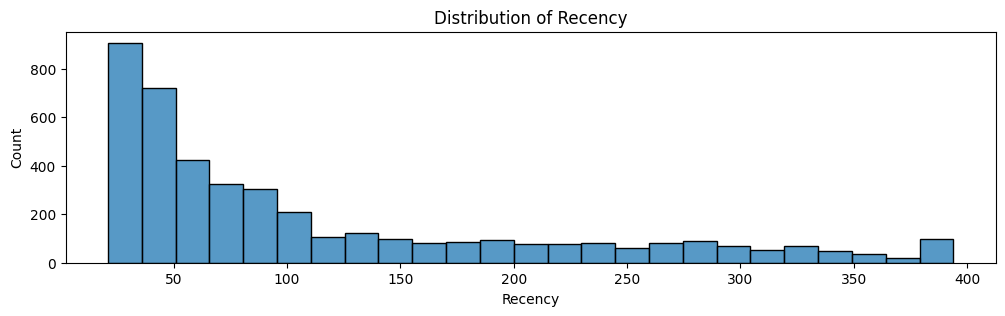

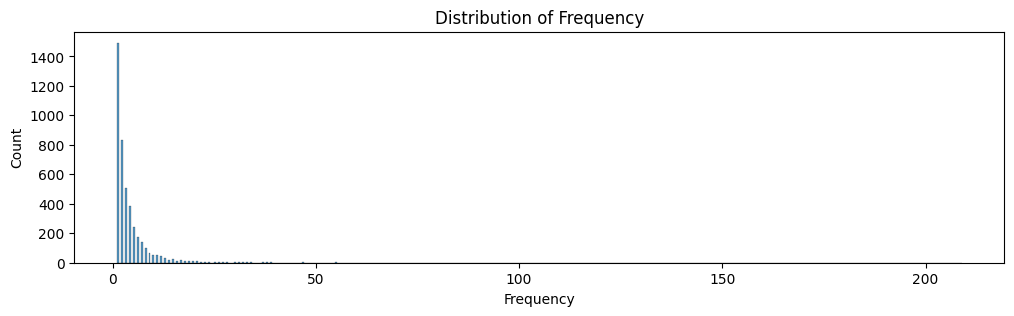

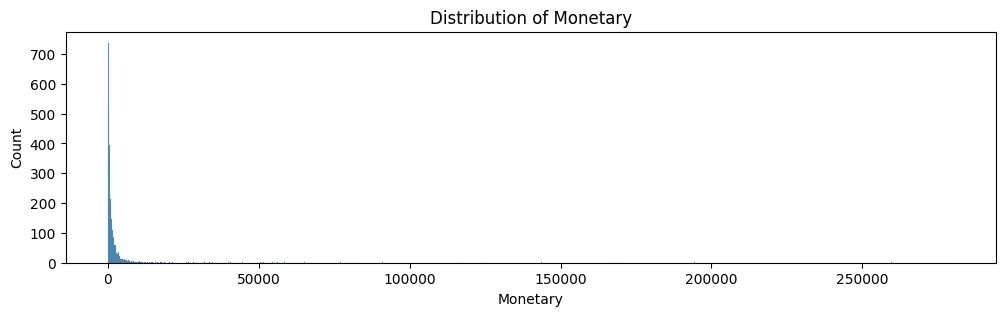

In [ ]:
# Show distribution of 'Recency', 'Frequency', 'Monetary'
# --> # Use loop through each column and plot its distribution
colnames = ['Recency', 'Frequency', 'Monetary']


for col in colnames:
    fig, ax = plt.subplots(figsize=(12, 3))  # Set figure size
    sns.histplot(RFM_table_segment[col])  # Create a distribution plot
    ax.set_title('Distribution of %s' % col)  # Set the title for each plot
    plt.show()  # Display the plot

## Tree map

In [ ]:
!pip install squarify
import squarify

### Segment Share of Total Customers

In [ ]:
group_segment_by_customer = RFM_table_segment.groupby('Segment')['CustomerID'].count().reset_index(name='Cust_count')

# Calculate Count_share
total_customers = RFM_table_segment['CustomerID'].count()
group_segment_by_customer['Count_share'] = (group_segment_by_customer['Cust_count'] / total_customers)
group_segment_by_customer

,Segment,Cust_count,Count_share
0,About To Sleep,286,0.065929
1,At Risk,423,0.097510
2,Cannot Lose Them,92,0.021208
3,Champions,834,0.192254
4,Hibernating customers,693,0.159751
5,Lost customers,485,0.111803
6,Loyal,426,0.098202
7,Need Attention,287,0.066160
8,New Customers,268,0.061780
9,Potential Loyalist,411,0.094744


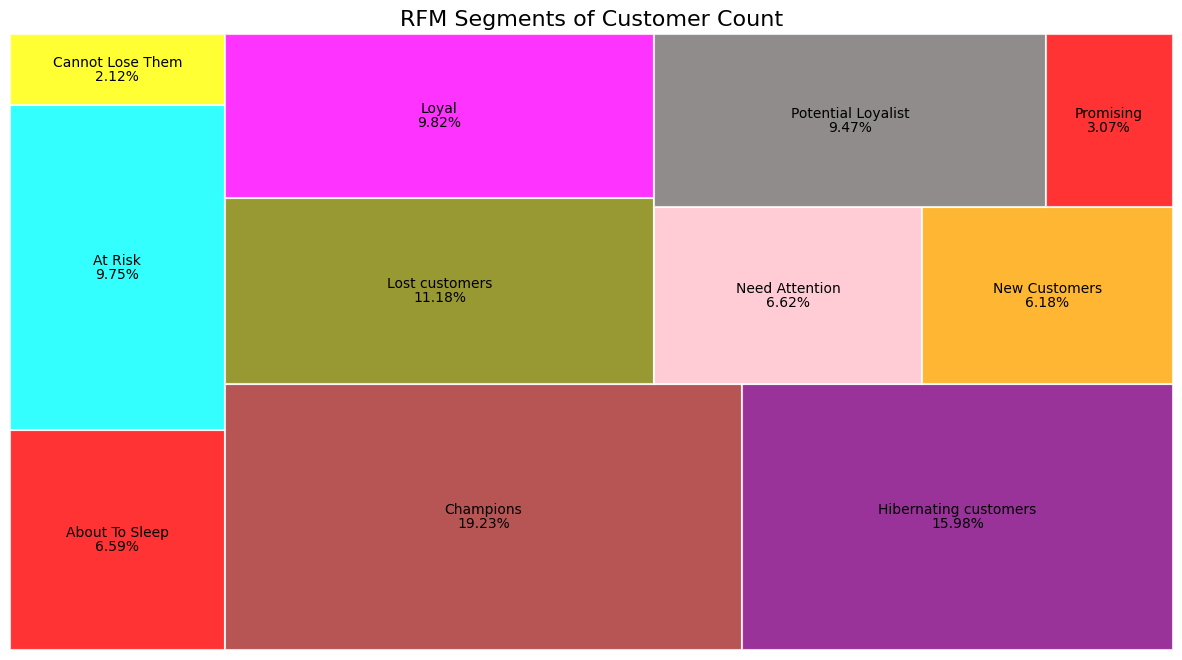

In [ ]:
# Define 10 colors corresponding 10 segment for the treemap
colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#808000', '#FF00FF', '#FFC0CB', '#FFA500', '#736F6E']

# Create figure and axis
fig, ax = plt.subplots(1, figsize=(15, 8))

# Plot the treemap
squarify.plot(sizes=group_segment_by_customer['Cust_count'],  # Sizes for the treemap based on customer count
              label=group_segment_by_customer['Segment'],     # Labels for each segment
              value=[f'{x*100:.2f}%' for x in group_segment_by_customer['Count_share']],  # Percentage values for each segment
              alpha=.8,                 # Set transparency
              color=colors,             # Define colors
              bar_kwargs=dict(linewidth=1.5, edgecolor="white"))  # Bar properties

# Set title for the treemap
plt.title('RFM Segments of Customer Count', fontsize=16)

# Remove axis for better visualization
plt.axis('off')

# Display the plot
plt.show()


### Segment Share of Total Sales

In [ ]:
group_segment_by_total_sales = RFM_table_segment.groupby('Segment')['Monetary'].sum().reset_index(name='Total_Sales')

# Calculate percentage of segment by Total_Sales
total_sales = RFM_table_segment['Monetary'].sum()
group_segment_by_total_sales['Per_of_Sale'] = (group_segment_by_total_sales['Total_Sales'] / total_sales)
group_segment_by_total_sales

,Segment,Total_Sales,Per_of_Sale
0,About To Sleep,78743.090,0.008860
1,At Risk,750634.391,0.084462
2,Cannot Lose Them,204036.680,0.022958
3,Champions,5591628.710,0.629177
4,Hibernating customers,282751.372,0.031816
5,Lost customers,96590.980,0.010869
6,Loyal,1015451.640,0.114260
7,Need Attention,467188.591,0.052569
8,New Customers,59674.930,0.006715
9,Potential Loyalist,221408.990,0.024913


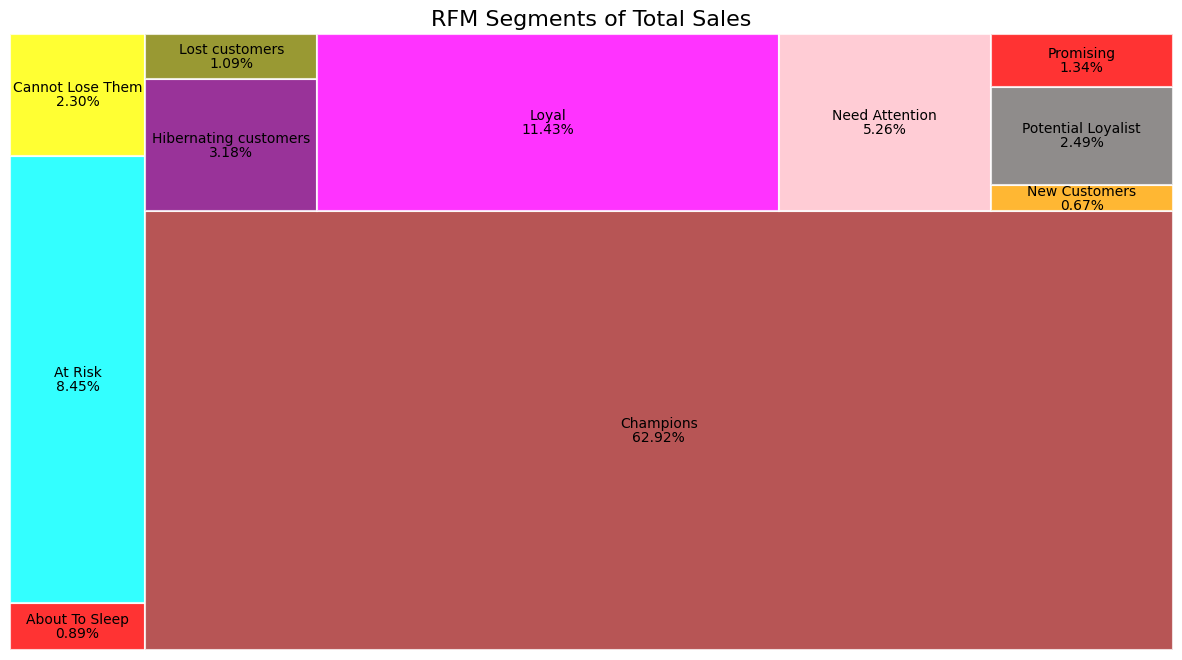

In [ ]:
# Define 10 colors corresponding 10 segment for the treemap
colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#808000', '#FF00FF', '#FFC0CB', '#FFA500', '#736F6E']

# Create figure and axis
fig, ax = plt.subplots(1, figsize=(15, 8))

# Plot the treemap
squarify.plot(sizes=group_segment_by_total_sales['Total_Sales'],  # Sizes for the treemap based on customer count
              label=group_segment_by_total_sales['Segment'],     # Labels for each segment
              value=[f'{x*100:.2f}%' for x in group_segment_by_total_sales['Per_of_Sale']],  # Percentage values for each segment
              alpha=.8,                 # Set transparency
              color=colors,             # Define colors
              bar_kwargs=dict(linewidth=1.5, edgecolor="white"))  # Bar properties

# Set title for the treemap
plt.title('RFM Segments of Total Sales', fontsize=16)

# Remove axis for better visualization
plt.axis('off')

# Display the plot
plt.show()
